# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

In [13]:
df = pd.DataFrame(data)

df['Estado_Civil'] = df['Estado_Civil'].str.replace('Casamento', 'Casado', regex=False)
df['Imovel_Proprio'] = df['Imovel_Proprio'].str.replace('0', 'Não', regex=False)
df['Imovel_Proprio'] = df['Imovel_Proprio'].str.replace('1', 'Sim', regex=False)
df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].str.replace('0', 'Não', regex=False)
df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].str.replace('1', 'Sim', regex=False)

df.head(8)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,Não,Casado,Não
1,Joao,30,Médico,8000,4000,Não,Casado,Não
2,Charlie,35,Professor,5000,4000,Não,Solteiro,Não
3,David,40,Advogado,10000,1000,Sim,Solteiro,Sim
4,Eva,45,Médico,12000,10000,Não,Casado,Sim
5,Diego,60,Engenheiro,15000,2000,Sim,Solteiro,Sim
6,Denize,22,Estudante,1200,500,Não,Solteiro,Não
7,Claudio,24,Estudante,1500,250,Sim,Solteiro,Não


Text(0.5, 1.0, 'Inadimplência')

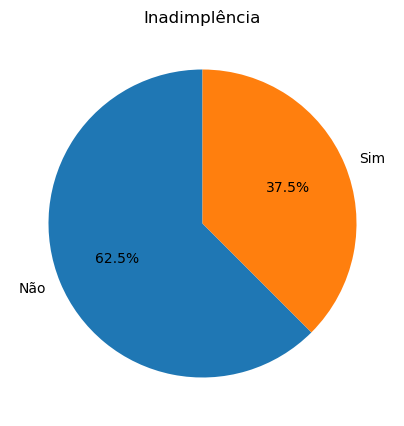

In [15]:
# O Gráfico de setores foi escolhido para ter uma noção da quantidade de pessoas que são inadimplentes

x = df['Historico_Inadimplencia'].value_counts().index
y = df['Historico_Inadimplencia'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(y, labels=x, autopct='%.1f%%', startangle=90)
plt.title('Inadimplência')

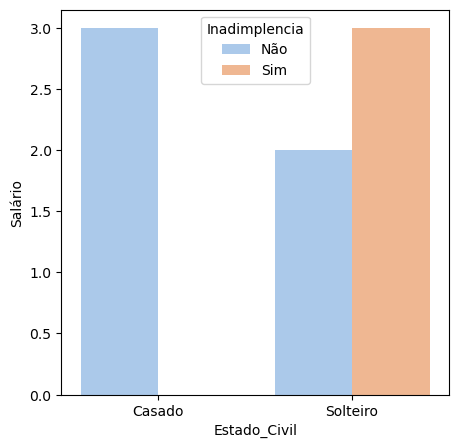

In [17]:
#Aqui eu fiz uma comparação para saber se o salário e o estado civil foram fatores que influenciaram a inadimplêcia

plt.figure(figsize=(5,5))
sns.countplot(x='Estado_Civil', hue='Historico_Inadimplencia', data=df, palette='pastel')
plt.xlabel('Estado_Civil')
plt.ylabel('Salário')
plt.legend(title='Inadimplencia')
plt.show()

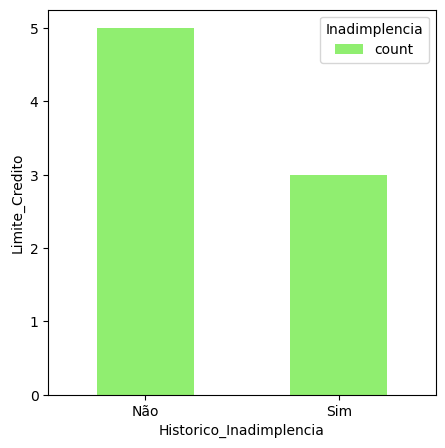

In [19]:
#Nesse gráfico é possivél ver que aqueles que são inadimplêntes conseguem um limite de crédito menor do que aqueles que não são

plt.figure(figsize=(5,5))
df['Historico_Inadimplencia'].value_counts().plot(kind='bar', color='#90ee70')
plt.xlabel('Historico_Inadimplencia')
plt.ylabel('Limite_Credito')
plt.legend(title='Inadimplencia')
plt.xticks(rotation=0)
plt.show()